За да филтрираме слика во фреквенциски домен потребно е да ја помножиме сликата во фреквенциски домен со филтерот (кернел) кој е исто така во фреквенциски домен.

\begin{equation}  \normalsize
I_f,_{filt} = HI_f 
\end{equation}

За таа цел потребно е да се вметне Octave функција која ќе креира “Band pass gaussian filter” во фреквенциски домен. Bandpass гаусовиот филтер во фреквенциски домен е дефиниран со равенката:

\begin{equation} \normalsize
H(i,j) = e^ {-\frac{d(i,j)^2}{f^2_h}} \Bigg(1 - e^ {-\frac{d(i,j)^2}{f^2_l}} \Bigg)
\end{equation}
Каде што 𝑑(𝑖,𝑗) е евклидовото растојанието на даден пиксел од центарот на сликата, додека 𝑓ℎ и 𝑓𝑙 се праговите на високите и ниските фреквенции кои сакаме да ги филтрираме.

Конверзија на 2D сликата од просторен во фреквенциски домен се прави со користење на Фуриева трансформација. Фуриевата трансформација е дефинирана како:

\begin{equation} \normalsize
F(u,v) = \iint^{\infty}_{-\infty} f(x,y)e^ {-i2\pi(ux+vy)} \, dxdy
\end{equation}

А во дискретниот домен горната равенка може да биде преведена како

\begin{equation} \normalsize
F(u,v) = \sum^{\infty}_{m=-\infty} \sum^{\infty}_{n=-\infty} f[m,n] \cdot e^ {-i2\pi(umx_0 + cny_0)}
\end{equation}

Конверзија на 2D сликата од фреквенциски во просторен домен се прави со користење на инверзна Фуриева трансформација. Инверзната Фуриева трансформација е дефинирана како:

\begin{equation} \normalsize
f(x,y) = \iint^{\infty}_{-\infty} F(u,v)e^ {i2\pi(ux+vy)} \, dudv
\end{equation}

А во дискретниот домен горната равенка може да биде преведена како

\begin{equation} \normalsize
f(x,y) = \sum^{\infty}_{m=-\infty} \sum^{\infty}_{n=-\infty} F(m,n) \cdot e^ {i2\pi(xmu_0 + ynv_0)}
\end{equation}


In [1]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
from pylab import *
from skimage import img_as_float
from skimage.io import imread
from skimage.color import rgb2gray
from skimage import io

In [2]:
from PIL import Image
from scipy.ndimage import imread

In [28]:
#imdata=imread('Barbara.tif');
#figure(1); imshow(imdata); #title('Original image');

imdata=rgb2gray(imdata);
#figure(2); imshow(imdata, cmap='gray'); #title('Gray image');

#F=fft2(imdata);
#S=abs(F);
#figure(1); imshow(S,[]);

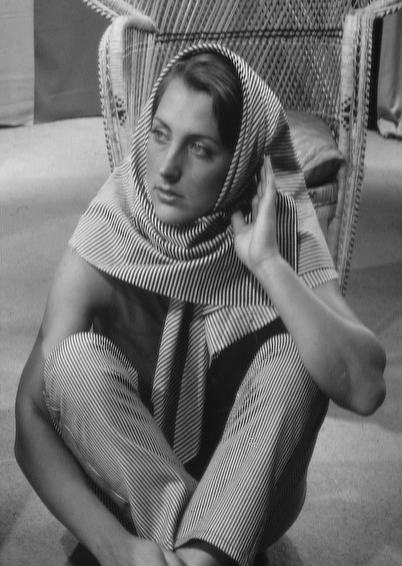

In [4]:
from PIL import Image
from io import BytesIO
# create image from binary content
#i = Image.open(BytesIO(r.content))



imdata = Image.open('Barbara.tif')
width, height = imdata.size
#print(width, height)
imdata = imdata.resize((402,566))
display(imdata)

In [12]:
import scipy.fftpack as fp

## Functions to go from image to frequency-image and back
im2freq = lambda data: fp.rfft(fp.rfft(data, axis=0),
                               axis=1)
freq2im = lambda f: fp.irfft(fp.irfft(f, axis=1),
                             axis=0)



# Make frequency-image 
freq = im2freq(np.array(Image.open('Barbara.tif')))


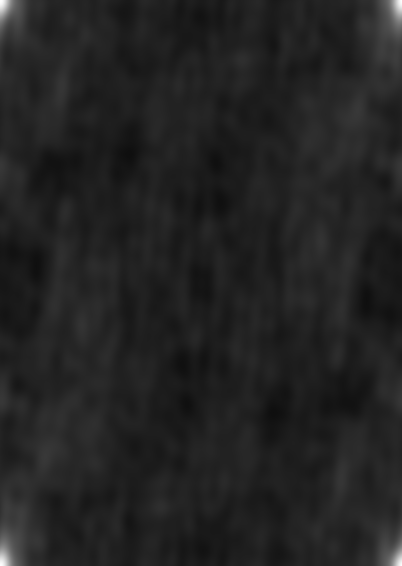

In [17]:


def fft(channel):
    fft = np.fft.fft2(channel)
    fft *= 255.0 / fft.max()  # proper scaling into 0..255 range
    return np.absolute(fft)

input_image = Image.open("Barbara.tif")
channels = input_image.split()  # splits an image into R, G, B channels
result_array = np.zeros_like(input_image)  # make sure data types, 
# sizes and numbers of channels of input and output numpy arrays are the save

if len(channels) > 1:  # grayscale images have only one channel
    for i, channel in enumerate(channels):
        result_array[..., i] = fft(channel)
else:
    result_array[...] = fft(channels[0])

result_image = Image.fromarray(result_array)
result_image.save('Nova.tif')
#display(result_image)



In [39]:
import ipywidgets as widgets

In [40]:
widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Frequency cutoffs:',
    value=0
   
)



IntSlider(value=0, description='Frequency cutoffs:', max=10)

In [30]:
from IPython.display import display

In [4]:
import scipy.io as sio

In [7]:
mat_contents = sio.loadmat('myfile.mat')
mat_contents



ValueError: Unknown mat file type, version 32, 105